In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/archive (6).zip")

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


#Dataset description
1. step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
2. type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
3. amount - amount of the transaction in local currency.
4. nameOrig - customer who started the transaction
5. oldbalanceOrg - initial balance before the transaction
6. newbalanceOrig - new balance after the transaction
7. nameDest - customer who is the recipient of the transaction
8. oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
9. newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
10. isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
11. isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

#Imbalanced Dataset
###The target class labels’ numbers of observation is significantly lower than other class labels. This type of dataset is called an imbalanced class dataset which is very common in practical classification scenarios which may affect performance of statistical algorithms or machine learning models.

In [ ]:
df1 = df.copy()
df1[df1['isFraud'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [ ]:
df1[df1['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


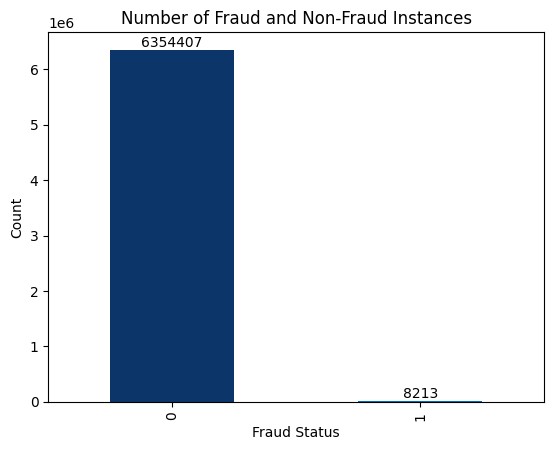

In [ ]:
from matplotlib import pyplot as plt
# Count the occurrences of fraud and non-fraud
fraud_counts = df1['isFraud'].value_counts()

# Plot a bar chart
fraud_counts.plot(kind='bar', color=['#0C356A', '#0174BE'])
ax = fraud_counts.plot(kind='bar', color=['#0C356A', '#0174BE'])
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.title('Number of Fraud and Non-Fraud Instances')

# Add text annotations for total count on top of each bar
for i, count in enumerate(fraud_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()

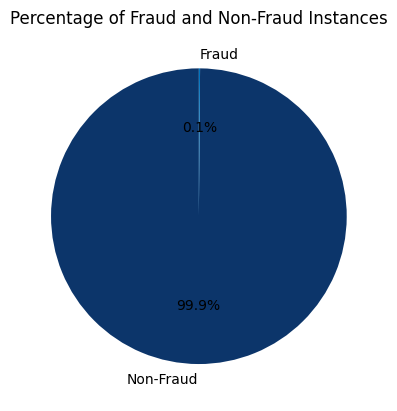

In [ ]:
# Count the occurrences of fraud and non-fraud
fraud_counts = df1['isFraud'].value_counts()

# Plot a pie chart
labels = ['Non-Fraud', 'Fraud']
colors = ['#0C356A', '#0174BE']
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Fraud and Non-Fraud Instances')
plt.show()

###The main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class

#Handle Imbalanced Dataset


In [ ]:
df2 = df.copy()
df2['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

#Approach to Handle Imbalanced Data Set Problem

1.   Resampling (Uppersampling and Downsampling)
2.   Synthetic Minority Oversampling Technique
3.   BalancedBaggingClassifier







##Downsampling
###This technique is used to  downsample the majority class. When we are using an imbalanced dataset, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling. After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

###Below technique using the sklearn library’s resample() is shown below for illustration purposes.

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df2[(df2['isFraud']==0)]
df_minority = df2[(df2['isFraud']==1)]
# upsample minority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample with replacement
                                 n_samples= 8213, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
df_downsampled['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

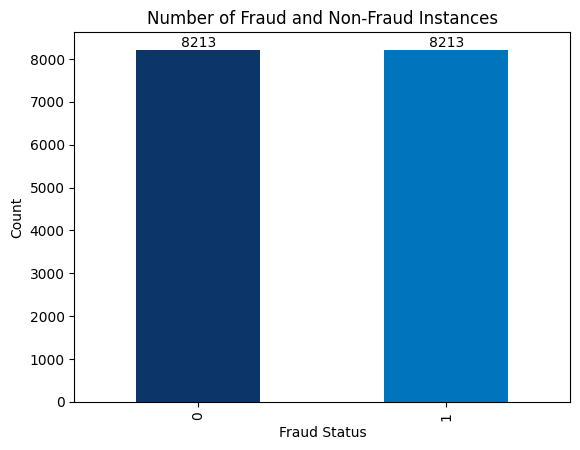

In [ ]:
from matplotlib import pyplot as plt
# Count the occurrences of fraud and non-fraud
fraud_counts = df_downsampled['isFraud'].value_counts()

# Plot a bar chart
fraud_counts.plot(kind='bar', color=['#0C356A', '#0174BE'])
ax = fraud_counts.plot(kind='bar', color=['#0C356A', '#0174BE'])
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.title('Number of Fraud and Non-Fraud Instances')

# Add text annotations for total count on top of each bar
for i, count in enumerate(fraud_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

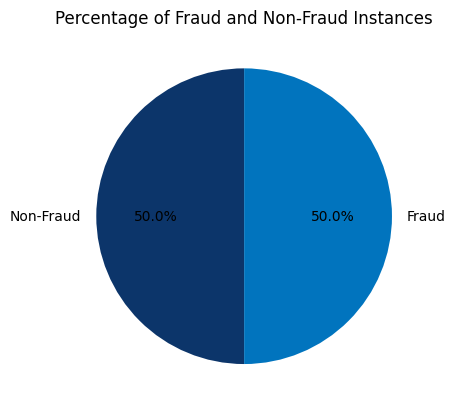

In [ ]:
# Count the occurrences of fraud and non-fraud
fraud_counts = df_downsampled['isFraud'].value_counts()

# Plot a pie chart
labels = ['Non-Fraud', 'Fraud']
colors = ['#0C356A', '#0174BE']
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Fraud and Non-Fraud Instances')
plt.show()

#Data Preparation
Data preparation is a crucial step in machine learning, especially for fraud detection where data quality greatly impacts the model's effectiveness
##Data Cleaning




###Handling Outliers
Outliers in fraud detection data might represent suspicious or anomalous behavior. Identifying and handling outliers requires careful consideration.

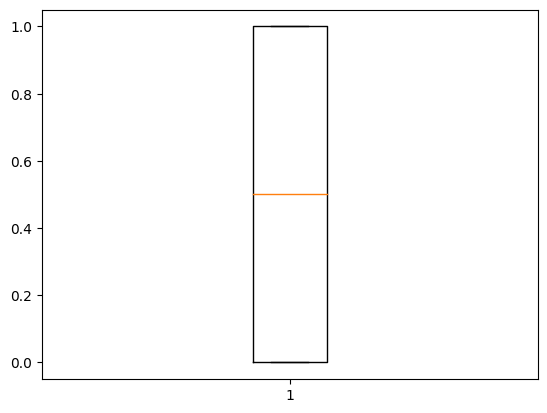

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_downsampled['isFraud'])
plt.show()

In [ ]:
All_Q1 = df_downsampled.quantile(0.25)
W_Q1 = All_Q1['isFraud']
W_Q1

<ipython-input-17-8d204cfb4aea>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  All_Q1 = df_downsampled.quantile(0.25)


0.0

In [ ]:
All_Q3 = df_downsampled.quantile(0.75)
W_Q3 = All_Q3['isFraud']
W_Q3

<ipython-input-18-67c7f280e83b>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  All_Q3 = df_downsampled.quantile(0.75)


1.0

In [ ]:
IQR = W_Q3 - W_Q1
IQR

1.0

In [ ]:
lower_values = df_downsampled['isFraud'] < W_Q1 - (1.5 * IQR)
lower_values.sum()

0

In [ ]:
lower_rows = df_downsampled[df_downsampled['isFraud'] < W_Q1 - (1.5*IQR)].index.tolist()
print(lower_rows)

[]


In [ ]:
df.iloc[lower_rows]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
clean_data = df_downsampled[-((df_downsampled['isFraud']< W_Q1 - (1.5*IQR)) | (df_downsampled['isFraud'] > W_Q3 + (1.5*IQR)))]

In [ ]:
clean_data.shape

(16426, 11)

In [ ]:
clean_data['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

###Missing Values Hadling
Missing data can adversely affect the model's performance.

In [ ]:
clean_data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#Data Transform
The 'type of transaction' column (e.g., 'CASH_OUT', 'TRANSFER', 'PAYMENT', 'CASH_IN', 'DEBIT') represents different transaction types in alphabetical order. To make these categorical values usable in machine learning models, encoding them into numerical representations is necessary. In this case, transforming the transaction types into integers:

* CASH_IN will be encoded as 0.
* CASH_OUT will be encoded as 1.
* DEBIT will be encoded as 2.
* PAYMENT will be encoded as 3.
* TRANSFER will be encoded as 4.

This transformation maps each transaction type to a unique integer based on their alphabetical order, creating a numerical representation that machine learning algorithms can effectively utilize.

In [ ]:
clean_data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
clean_data['type'].value_counts()

CASH_OUT    7066
TRANSFER    4750
PAYMENT     2735
CASH_IN     1825
DEBIT         50
Name: type, dtype: int64

In [ ]:
clean_data['nameOrig'].value_counts()

C691771226     1
C1263272342    1
C1843566745    1
C351713185     1
C58682758      1
              ..
C944685644     1
C736006600     1
C1294515646    1
C73296501      1
C1280323807    1
Name: nameOrig, Length: 16426, dtype: int64

In [ ]:
clean_data['nameDest'].value_counts()

C1561140816    3
C2020337583    3
C164033249     3
C1875540277    3
C330226144     2
              ..
M1792844041    1
C1299718574    1
C312306105     1
M523692779     1
C2080388513    1
Name: nameDest, Length: 16235, dtype: int64

In [ ]:
df_cln=clean_data.copy()

In [ ]:
clean_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1777056,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0
1350600,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0
1991933,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0
5092368,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0
5066515,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


CASH_OUT    7066
TRANSFER    4750
PAYMENT     2735
CASH_IN     1825
DEBIT         50
Name: type, dtype: int64


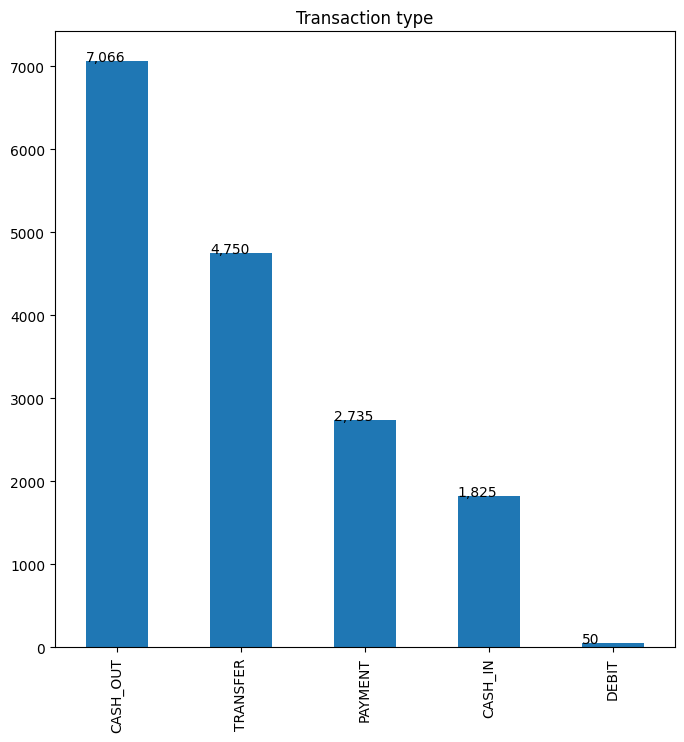

In [ ]:
print(clean_data.type.value_counts())
f, ax = plt.subplots(1, 1, figsize=(8, 8))
clean_data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
my_encoder = LabelEncoder()
df_cln['type'] = my_encoder.fit_transform(df_cln['type'])
#0 for CASH_IN 1 for CASH_OUT 2 for DEBIT 3 for PAYMENT 4 for TRANSFER. these values asign according to alphabetical  order

In [ ]:
df_cln.dtypes

step                int64
type                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
my_encoder = LabelEncoder()
df_cln['nameOrig'] = my_encoder.fit_transform(df_cln['nameOrig'])

In [ ]:
df_cln.dtypes

step                int64
type                int64
amount            float64
nameOrig            int64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
my_encoder = LabelEncoder()
df_cln['nameDest'] = my_encoder.fit_transform(df_cln['nameDest'])

In [ ]:
df_cln.dtypes

step                int64
type                int64
amount            float64
nameOrig            int64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df_cln

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1777056,162,1,183806.32,13825,19391.00,0.00,2838,382572.19,566378.51,0,0
1350600,137,3,521.37,8934,0.00,0.00,15435,0.00,0.00,0,0
1991933,179,3,3478.18,6065,19853.00,16374.82,15741,0.00,0.00,0,0
5092368,355,3,1716.05,15672,5769.17,4053.13,14056,0.00,0.00,0,0
5066515,354,0,253129.93,8798,1328499.49,1581629.42,9322,2713220.48,2460090.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,14602,339682.13,0.00,11940,0.00,339682.13,1,0
6362616,743,4,6311409.28,4586,6311409.28,0.00,6158,0.00,0.00,1,0
6362617,743,1,6311409.28,1423,6311409.28,0.00,2453,68488.84,6379898.11,1,0
6362618,743,4,850002.52,5974,850002.52,0.00,7510,0.00,0.00,1,0


#Data Reduction
In the dataset used for fraud detection, certain columns such as 'nameOrig', 'nameDest', and 'isFlaggedFraud' might not contribute significantly to the detection of fraudulent activities or might contain information that is irrelevant to the model.

* nameOrig and nameDest: These columns might represent identification or destination names, which typically do not contain useful patterns or insights regarding fraudulent behavior. Hence, they can be removed to reduce unnecessary dimensionality.

* isFlaggedFraud: Although 'isFlaggedFraud' indicates a flagged transaction, in some datasets, it might not have enough variance or relevance for meaningful analysis. If this column doesn’t provide sufficient predictive power or contains mostly one type of value, removing it can streamline the dataset without losing critical information.

In [ ]:
df_reduction = df_cln.copy();

In [ ]:
list(df_cln.columns)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

Correlation Matrix:
                    step      type    amount  nameOrig  oldbalanceOrg  \
step            1.000000  0.097230  0.149111 -0.006061       0.074185   
type            0.097230  1.000000  0.112007 -0.000257      -0.071468   
amount          0.149111  0.112007  1.000000  0.017550       0.646056   
nameOrig       -0.006061 -0.000257  0.017550  1.000000       0.014088   
oldbalanceOrg   0.074185 -0.071468  0.646056  0.014088       1.000000   
newbalanceOrig -0.022918 -0.183056  0.123465  0.006553       0.824217   
nameDest       -0.104483  0.185777 -0.114270 -0.009775      -0.095401   
oldbalanceDest -0.006124 -0.132000  0.005105  0.015011       0.008734   
newbalanceDest  0.027531 -0.176528  0.256852  0.019683       0.117984   
isFraud         0.320576  0.273082  0.345287  0.002854       0.125072   
isFlaggedFraud  0.037332  0.040256  0.067676  0.013601       0.063118   

                newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  \
step                 -0.022

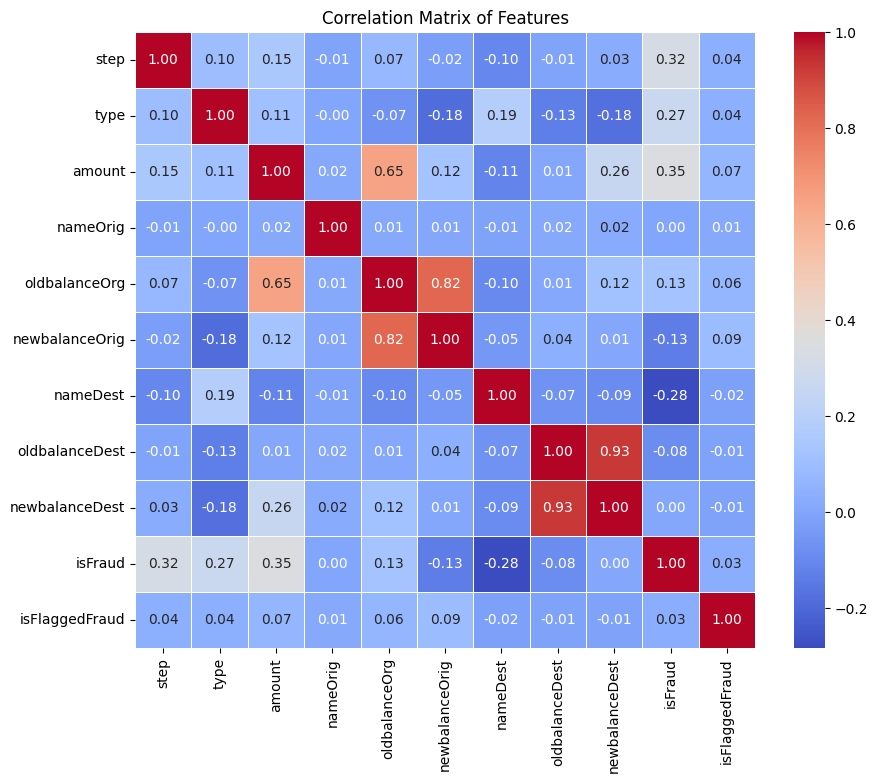

In [ ]:
# Selecting relevant columns for correlation analysis
relevant_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
selected_data = df_reduction[relevant_columns]

# Calculating correlation matrix
correlation_matrix = selected_data.corr()

# Printing correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

From the correlation matrix provided, the columns that appear to have relatively lower correlations (absolute values) with other variables are:

01. nameOrig
02. nameDest
03. isFlaggedFraud

In [ ]:
df_new_reduction = df_reduction[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]

In [ ]:
df_new_reduction

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1777056,162,1,183806.32,19391.00,0.00,382572.19,566378.51,0
1350600,137,3,521.37,0.00,0.00,0.00,0.00,0
1991933,179,3,3478.18,19853.00,16374.82,0.00,0.00,0
5092368,355,3,1716.05,5769.17,4053.13,0.00,0.00,0
5066515,354,0,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


#Model Planning
Fraud detection involves predicting whether a transaction or activity is fraudulent or not, making it inherently a binary classification problem. Classification models are well-suited for this task as they learn patterns from labeled data to categorize new instances into predefined classes. In fraud detection, the goal is to accurately classify transactions as either fraudulent or non-fraudulent, enabling timely intervention or investigation.

#Model Building
###Decision Tree

In [ ]:
#load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classification
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn import metrics #import scikit-learn metrics module for accuracy

In [ ]:
df_prepared =df_new_reduction.copy()

In [ ]:
df_prepared.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
#split dataset in features and target variable
feature_cols = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud']
x = df_prepared.drop(columns=['isFraud']) # Features
y = df_prepared.isFraud # Target variable

In [ ]:
#Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(11498, 7)

In [ ]:
x_test.shape

(4928, 7)

In [ ]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

#Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
#Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.989650974025974


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [ ]:
#Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
#Model accuracy how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9441964285714286


###Random forest tree

In [ ]:
df_prepared1 =df_new_reduction.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#split dataset in features and target variable
feature_cols = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud']
X = df_prepared1.drop(columns=['isFraud']) # Features
Y = df_prepared1.isFraud # Target variable

In [ ]:
#Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(11498, 7)

In [ ]:
X_test.shape

(4928, 7)

In [ ]:
#Create Decision Tree classifer object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Train Decision Tree Classifer
rfc = rfc.fit(X_train,Y_train)

In [ ]:
#Predict the response for test dataset
rf_pred = rfc.predict(X_test)

In [ ]:
#Model accuracy how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test,rf_pred))

Accuracy: 0.9916801948051948


###Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df_prepared2 =df_new_reduction.copy()

In [ ]:
#split dataset in features and target variable
feature_cols = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud']
NB_X = df_prepared2.drop(columns=['isFraud']) # Features
NB_Y = df_prepared2.isFraud # Target variable

In [ ]:
#Split dataset into training set and test set
NB_X_train, NB_X_test, NB_Y_train, NB_Y_test = train_test_split(NB_X, NB_Y, test_size=0.3, random_state=42)

In [ ]:
NB_X_train.shape

(11498, 7)

In [ ]:
NB_X_test.shape

(4928, 7)

In [ ]:
#instantiant the model
mnb = MultinomialNB()

#fit the model
mnb.fit(NB_X_train, NB_Y_train)

MultinomialNB()

In [ ]:
NB_Y_pred = mnb.predict(NB_X_test)

In [ ]:
#Model accuracy how often is the classifier correct?
print("Accuracy:",accuracy_score(NB_Y_test,NB_Y_pred))

Accuracy: 0.7463474025974026


#Conclusion
The performance evaluation of the machine learning models reveals varying levels of accuracy. The Random Forest Tree model demonstrates the highest accuracy of 99.17%, followed closely by the Decision Tree model with an accuracy of 98.97%. In comparison, the Multinomial Naive Bayes model achieves a comparatively lower accuracy of 74.63%.

The Random Forest Tree and Decision Tree models showcase significantly higher accuracy rates compared to the Multinomial Naive Bayes model. Therefore, for this specific fraud detection task, the ensemble-based Random Forest Tree and the individual Decision Tree models exhibit superior performance in accurately classifying fraudulent transactions when compared to the Multinomial Naive Bayes model.

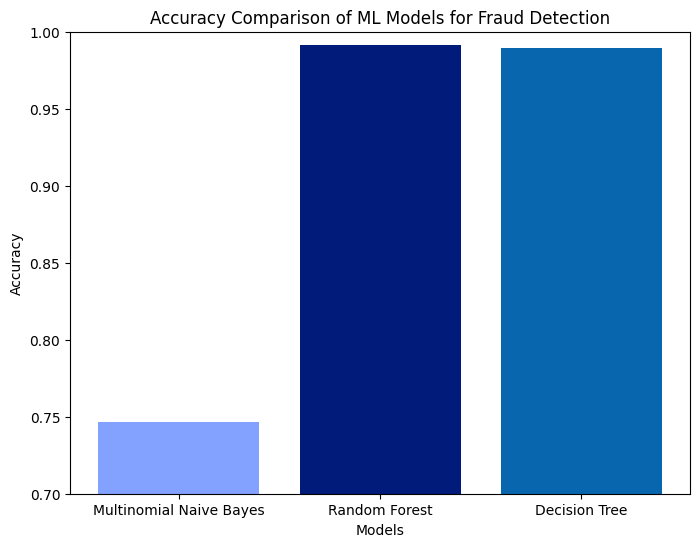

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Multinomial Naive Bayes', 'Random Forest', 'Decision Tree']
accuracies = [0.7463474025974026, 0.9916801948051948, 0.989650974025974]

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['#83A2FF', '#001B79', '#0766ad'])
plt.ylim(0.7, 1.0)  # Setting y-axis limits
plt.title('Accuracy Comparison of ML Models for Fraud Detection')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()